# Óscar Gómez Borzdynski
## Práctica 2
### Procesos Estocásticos

In [33]:
import intrf
import markov
import numpy as np
import sys
import math
from random import uniform
import seaborn as sns

In [12]:
%%html
<style>
    h1, h2, h3 {color: #3d6f91;}
    b, li, ul {color: #5D8AA8;}
</style>

## Métodos y clases previos

Utilizamos la clase Markov proporcionada por el profesor y definimos un método auxiliar que devuelve la matriz de transición en función de los valores de p y q.

In [13]:
# Returns the Probability matrix for our graphs
def get_PT(p=0.3, q=0.0):
    return [[  1-p,    p,    0.0,    0.0,    0.0,    0.0], 
      [  0.0,  1-p,  p/2.0,    0.0,   p/2.0,   0.0],
      [1/4.0,  0.0,  1/4.0,   1/4.0,  1/4.0,   0.0],
      [    q,  0.0,    0.0,   0.9-q,    0.1,   0.0],
      [  0.0,  0.0,    0.0,     0.0,  1/2.0, 1/2.0],
      [  0.0,  0.0,    0.0,    1/4.0, 1/2.0, 1/4.0] 
            
      ]
#
# This class implements a Markov chain. Upon creation, a transition
# matrix and an initial state are given. The chain may be executed and
# it keeps track of the probability that at time t it is in state m.
#
class Markov:

    #
    # Initialization function
    #
    def __init__(self, PT, m_ini):
        self.PT = PT
        self.nstate = len(PT[0])
        self.state = m_ini
        self.steps = 1      # Number of steps executed so far (for the 
                            # computation of averages)
        self.count = self.nstate*[0]  # count of the times a state was visited
        self.count[self.state] = 1

    #
    # Given a state and the transition probability matrix PT, determine a
    # new state with the probabilities prescribed by the matrix. Returns
    # the value of the new state.
    #
    def _transition(self, m):
        p = self.PT[m]
        u = uniform(0.0, 1.0)
        a = 0
        for k in range(len(p)):
            a = a + p[k]
            if u < a:
                return k
        return len(p)-1

    #
    # Makes a step of the Markov chain: generates a new state, updates
    # the current state, the step counter and the state counter. 
    #
    # Returns the new state of the chain
    #
    def step(self):
        mnew = self._transition(self.state)
        self.state = mnew
        self.steps = self.steps+1
        self.count[self.state] = self.count[self.state] + 1
        return mnew

# Ejercicio 1

<b>Simular el funcionamiento de la cadena y hacer una estimacion de conjunto de $h^2_0$ y $h^5_0$ para $q = 0.1$ y $q= 0$.</b>

Primero debemos definir una función que nos devuelva todos los $h$ en función del estado de entrada.

In [14]:
#
# Runs a set of NC chains (with transition PT and initial state m_ini)
# for a total of T steps and at the end returns probability of ever reaching each state
#
def set_run_h(NC, PT, m_ini, T):
    chains = [Markov(PT, m_ini) for _ in range(NC)]
    state_no = len(PT[0])
    state = np.zeros((NC, state_no))
    for k in range(NC):
        state[k][m_ini] = 1
    for t in range(T):
        for k in range(NC):
            state[k][chains[k].step()] = 1

    return state.mean(axis=0)

In [15]:
starting_at = 0
q = 0.0
print(f"q = {q}, comenzando en el estado {starting_at}:")
h = set_run_h(1000, get_PT(q=q), starting_at, 1000)
print(f"h2 = {h[2]}, h5 = {h[5]}")
q = 0.1
print(f"q = {q}, comenzando en el estado {starting_at}:")
h = set_run_h(1000, get_PT(q=q), starting_at, 1000)
print(f"h2 = {h[2]}, h5 = {h[5]}")

q = 0.0, comenzando en el estado 0:
h2 = 0.546, h5 = 1.0
q = 0.1, comenzando en el estado 0:
h2 = 1.0, h5 = 1.0


Estos valores nos indican que con $q=0$, tenemos una clase absorbente que impide que la cadena pase por el estado $2$ en algunas de las cadenas de la simulación. Además podemos ver que el estado $5$ si pertenece a esa clase absorbente dado que la probabilidad de pasar por él es $1$.

Con $q=1$ la clase anterior desaparece y por ello la cadena es capaz de volver al estado $2$, haciendo que su $h$ sea $1$.

# Ejercicio 2

<b>Simular el funcionamiento de la cadena y hacer una estimacion de conjunto de $k^2_0$ y $k^2_4$ para $q = 0.1$ y $q= 0$.</b>

Primero debemos definir una función que nos devuelva todos los $k$ en función del estado de entrada.

In [42]:
# Runs a set of NC chains (with transition PT and initial state m_ini)
# for a total of T steps and at the end returns the mean time to reach each state
#
def set_run_k(NC, PT, m_ini, T):
    chains = [Markov(PT, m_ini) for _ in range(NC)]
    state_no = len(PT[0])
    state = np.ones((NC, state_no)) * np.inf
    for k in range(NC):
        state[k][m_ini] = 0
    for t in range(1,T+1):
        for k in range(NC):
            c = chains[k].step()
            state[k][c] = t if state[k][c] == np.inf else state[k][c]

    return state.mean(axis=0)

In [45]:
starting_at = 0
q = 0.0
print(f"q = {q}, comenzando en el estado {starting_at}:")
k = set_run_k(1000, get_PT(q=q), starting_at, 1000)
print(f"k2 = {k[2]}")
q = 0.1
print(f"q = {q}, comenzando en el estado {starting_at}:")
k = set_run_k(1000, get_PT(q=q), starting_at, 1000)
print(f"k2 = {k[2]}")

starting_at = 4
q = 0.0
print(f"q = {q}, comenzando en el estado {starting_at}:")
k = set_run_k(1000, get_PT(q=q), starting_at, 1000)
print(f"k2 = {k[2]}")
q = 0.1
print(f"q = {q}, comenzando en el estado {starting_at}:")
k = set_run_k(1000, get_PT(q=q), starting_at, 1000)
print(f"k2 = {k[2]}")

q = 0.0, comenzando en el estado 0:
k2 = inf
q = 0.1, comenzando en el estado 0:
k2 = 40.788
q = 0.0, comenzando en el estado 4:
k2 = inf
q = 0.1, comenzando en el estado 4:
k2 = 70.309


Podemos ver que obtenemos valores $k$ infinitos, esto se debe a que la media de un conjunto cuando uno de los valores es infinito es infinito. Cuando una cadena no pasa por el estado $n$, el tiempo necesario para llegar a ese estado es inifinito. Dado que, como hemos visto en el ejercicio anterior, la probabilidad de llegar al estado $2$ no es $1$ para $q=0$, es posible que una cadena del conjunto no llegue a pasar por él y por tanto se le asigne un tiempo inifinito.

# Ejercicio 3

<b>Usar el sistema de ecuaciones lineares oportuno para determinar los valores teoricos correspondientes a las cantidades estimadas y comparar con los valores determinados por medio de la simulacion (cuidado: si una cantidad $k$ es $\infty$ la simulacion claramente no puede dar su valor real...  discutir este caso).</b>

Comenzamos con $q=0$, podemos ver que la clase formada por los nodos $3$, $4$ y $5$ es absorbente y por tanto podemos decir que $h_{3,4,5}^2 = 0$. Por ello el sistema lineal que debemos resolver está formado por (terminando en 2):

$$\left\{
\begin{array}\\
h_0 = 0.3h_1 + 0.7h_0 \\
h_1 = 0.15h_2 + 0.7h_1 \\
h_2 = 1
\end{array}\right.
$$

Por tanto $h_1 = 1/2$ y $h_0 = 1/2$. Podemos ver que en el primer ejercicio habíamos obtenido $h_0^2 \sim 1/2$

Para calcular $h_0^5$ volvemos a un sistema similar, pero ya no podemos tener en cuenta la clase absorbente ya que el nodo pertenece a ella:

$$\left\{
\begin{array}\\
h_0 = 0.3h_1 + 0.7h_0 \\
h_1 = 0.15h_2 + 0.15h_4 + 0.7h_1 \\
h_2 = 0.25h_0 + 0.25h_3 + 0.25h_4 + 0.25h_2 \\
h_3 = 0.1h_4 + 0.9h_3 \\
h_4 = 0.5h_5 + 0.5h_4\\
h_5 = 1
\end{array}\right.
$$


Por tanto $h_5 = h_4 = h_3 = h_2 = h_1 = h_0 = 1$. En este caso nuestra simulación acierta el valor.

Al añadir el enlace entre los nodos $3$ y $0$ con probabilidad $q=0.1$, nuestros sistemas cambian y pasan a ser de la siguiente forma (para $h_0^2$):

$$\left\{
\begin{array}\\
h_0 = 0.3h_1 + 0.7h_0 \\
h_1 = 0.15h_2 + 0.15h_4 + 0.7h_1 \\
h_2 = 1 \\
h_3 = 0.1h_4 + 0.1h_0 + 0.8h_3 \\
h_4 = 0.5h_5 + 0.5h_4 \\
h_5 = 0.5h_4 + 0.25h_3 + 0.25h_5
\end{array}\right.
$$

Resolviendo obtenemos que $h_5 = h_4 = h_3 = h_2 = h_1 = h_0 = 1$, al igual que mediante la simulación.

De igual manera, resolviendo para $h_0^5$, podemos ver que obtenemos la misma relación ($h_5 = h_4 = h_3 = h_2 = h_1 = h_0 = 1$)

En el caso de los $k$, debemos proceder de una manera algo diferente y comenzaremos haciéndolo para $q=0$. Como la clase $\{3,4,5\}$ es absorbente, su tiempo medio hasta el nodo $2$ es infinito:

$$\left\{
\begin{array}\\
k_0 = 1+ 0.3k_1 + 0.7k_0 \\
k_1 = 1 + 0.15k_2 + 0.15k_4 + 0.7k_1 \\
k_2 = 0 \\
k_3 = \infty \\
k_4 = \infty \\
k_5 = \infty
\end{array}\right.
$$

Por tanto $k_0^2 = k_4^2= \infty$, valores que conseguía la simulación. Para $q=0.1$, debemos establecer el sistema como:

$$\left\{
\begin{array}\\
k_0 = 1 + 0.3k_1 + 0.7k_0 \\
k_1 = 1 + 0.15k_2 + 0.15k_4 + 0.7k_1 \\
k_2 = 0 \\
k_3 = 1 + 0.1k_4 + 0.1k_0 + 0.8k_3 \\
k_4 = 1 + 0.5k_5 + 0.5k_4 \\
k_5 = 1 + 0.5k_4 + 0.25k_3 + 0.25k_5
\end{array}\right.
$$

y por tanto los valores obtenidos son: $k_0 = 43.33$ y $k_4 = 73.33$, valores similares a los obtenidos por simulación.

# Ejercicio 4

<b> para el caso $q = 0.1$, dibujar el gráfico de $g(t) = P[H^{\{4\}}_0=t]$ </b>

Para calcular este $H$ definimos una función que calcule los $H$ para cada estado y cada montecarlo. De esta manera podremos obtener los $H$ del estado 4 y ver su probabilidad.

In [39]:
# Runs a set of NC chains (with transition PT and initial state m_ini)
# for a total of T steps and at the end returns the mean time to reach each state
#
def set_run_H(NC, PT, m_ini, T):
    chains = [Markov(PT, m_ini) for _ in range(NC)]
    state_no = len(PT[0])
    state = np.ones((NC, state_no)) * np.inf
    for k in range(NC):
        state[k][m_ini] = 0
    for t in range(1,T+1):
        for k in range(NC):
            c = chains[k].step()
            state[k][c] = t if state[k][c] == np.inf else state[k][c]

    return state

In [46]:
q = 0.1
starting_at = 0
print(f"q = {q}, comenzando en el estado {starting_at}:")
H = set_run_H(1000, get_PT(q=q), starting_at, 1000)

q = 0.1, comenzando en el estado 0:


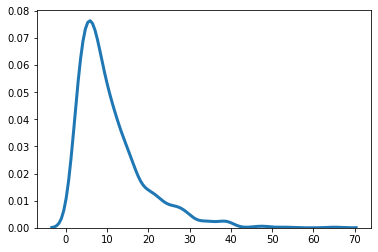

In [51]:
sns.distplot(H[:,4], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})

Esta gráfica parece seguir una distribución exponencial con media 11.

# Ejercicio 5
<b> Afirmo que $H^{\{4\}}_0< H^{\{5\}}_0$ siempre. ¿Es cierto? ¿Por qué? </b>
 
Podemos comprobarlo mediante simulación gracias a la función definida en el ejercicio anterior.

In [58]:
print(f"En media: H4 = {H[:,4].mean()}, H5 = {H[:,5].mean()}")
print(f"¿Todos los valores son mayores?: {(H[:,4] < H[:,5]).all()}")

En media: H4 = 10.956, H5 = 12.963
¿Todos los valores son mayores?: True


Podemos comprobar que mediante simulación está afirmación se puede considerar cierta. Ahora bien, si lo intentamos ver fuera del ámbito de la simulación, nos fijamos que todo camino que sale desde el nodo $0$ hasta el nodo $5$ pasa por el nodo $4$. Esto implica que el tiempo de pasar por primera vez por el nodo $5$ será siempre posterior al tiempo de pasar por primera vez por el nodo $4$, y, en el mejor de los casos, dado que se encuentra a una distancia de 1, tomará el valor $H_0^5 = H_0^4 + 1 \Rightarrow H_0^5 \geq H^4_0 + 1 \Rightarrow H_0^5 > H^4_0$